# Matrix walking

In [1]:
def walk(A):
    arow = A[0]
    n = len(arow)
    for i in range(n):
        for j in range(n):
            # process A[i][j] such as:
            print(f" {A[i][j]}", end='')
        print()

In [2]:
matrix =\
[[1, 1, 1, 0, 0],
 [0, 0, 1, 1, 1],
 [0, 1, 1, 1, 0],
 [1, 1, 0, 0, 1],
 [0, 1, 1, 1, 1]]

walk(matrix)

 1 1 1 0 0
 0 0 1 1 1
 0 1 1 1 0
 1 1 0 0 1
 0 1 1 1 1


# Tree walking

First, let's construct some trees

## Constructing binary tree

In [3]:
class TreeNode:
  def __init__(self, value, left=None, right=None):
    self.value = value
    self.left = left
    self.right = right
  def __repr__(self):
    return self.value.__repr__()

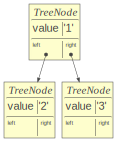

In [4]:
from lolviz import *
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
treeviz(root)

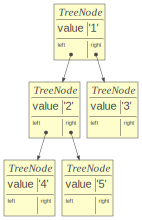

In [5]:
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
treeviz(root)

## Walking binary tree

In [6]:
def walk_tree(p:TreeNode) -> None:
    if p is None: return
    print(p.value) # "visit" node in preorder traversal position
    walk_tree(p.left)
    walk_tree(p.right)

In [7]:
walk_tree(root)

1
2
4
5
3


## Search binary tree

In [8]:
def search_tree(p:TreeNode, x:object) -> TreeNode:
    if p is None: return None
    if x==p.value: return p
    q = search_tree(p.left, x)
    if q is not None: return q
    return search_tree(p.right, x)

In [9]:
for i in range(6):
    p = search_tree(root, i)
    print(p)

None
1
2
3
4
5


## Constructing Binary Search Tree (BST)

In [10]:
# reuse TreeNode class
def add(p:TreeNode, value) -> None:
    "add nodes like a binary search tree"
    if p is None:
        return TreeNode(value)
    if value < p.value:
        p.left = add(p.left, value)
    elif value > p.value:
        p.right = add(p.right, value)
    # do nothing if equal (already there)
    return p

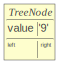

In [11]:
from lolviz import *
root = add(None, 9)
treeviz(root)

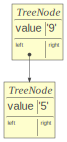

In [12]:
add(root, 5)
treeviz(root)

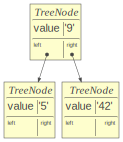

In [13]:
add(root, 42)
treeviz(root)

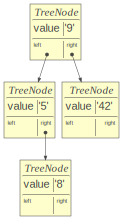

In [14]:
add(root, 8)
treeviz(root)

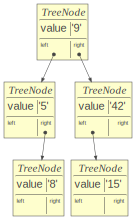

In [15]:
add(root, 15)
treeviz(root)

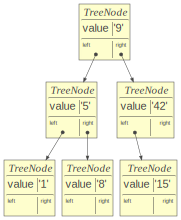

In [16]:
add(root, 1)
treeviz(root)

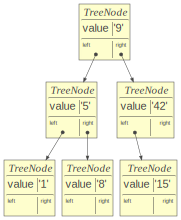

In [17]:
add(root, 5) # already there
treeviz(root)

## Walk binary search tree looking for element

In [18]:
def search(p:TreeNode, x:object) -> TreeNode:
    if p is None: return None
    if x<p.value: return search(p.left, x)
    if x>p.value: return search(p.right, x)
    return p

In [19]:
p = search(root,9)
p.value

9

In [20]:
for v in [9,15,5,42,8,1]:
    p = search(root,v)
    print(p.value)

9
15
5
42
8
1


In [21]:
p = search(root,999999) # test missing result
print(p)

None


# Constructing graphs

In [22]:
class Node:
  def __init__(self, value):
    self.value = value
    self.edges = [] # outgoing edges
  def add(self, target):
    self.edges.append(target)

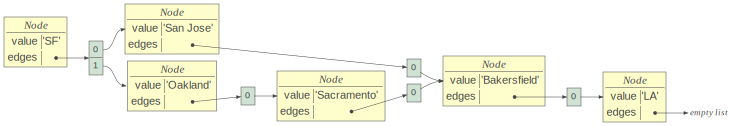

In [32]:
sf = Node("SF")
la = Node("LA")
sac = Node("Sacramento")
oak = Node("Oakland")
baker = Node("Bakersfield")
sj = Node("San Jose")
sf.add(sj)
sj.add(baker)
sf.add(oak)
oak.add(sac)
sac.add(baker)
baker.add(la)
objviz(sf)

## Walking graphs

In [24]:
def walk_graph(p:Node) -> None:
    if p is None: return
    print(p.value) # "visit" node in preorder traversal position
    for q in p.edges:
        walk_graph(q)

In [25]:
walk_graph(sf)

SF
San Jose
Bakersfield
LA
Oakland
Sacramento
Bakersfield
LA


## Dealing with cycles

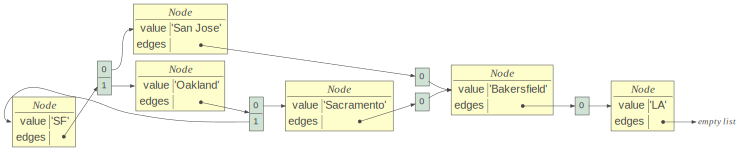

In [26]:
oak.add(sf) # add cycle
objviz(sf)

In [27]:
def walk_graph2(p:Node, seen:set) -> None:
    if p is None: return
    if p in seen: return
    seen.add(p)
    print(p.value) # "visit" node in preorder traversal position
    for q in p.edges:
        walk_graph2(q, seen)

In [28]:
# walk_graph(sf) # loops forever

In [29]:
walk_graph2(sf, set()) # pass in blank seen set

SF
San Jose
Bakersfield
LA
Oakland
Sacramento
